# 통계의 이해

In [31]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [3]:
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
mycars = pd.read_csv('mycars.csv')
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [7]:
# 요약 통계량
mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [9]:
# 자동차 모델별 , mpg데이터 subset
df = mycars[['model','mpg']]
# 모델별 데이터수 평균, 표준편차
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

# civic	9.0	24.444444	1.943651	21.0	24.00	24.0	25.00	28.0

In [22]:
df_mean=df.groupby('model').mean()
df_mean.sort_values(by = 'mpg' , ascending = True)

,mpg
model,
navigator 2wd,11.333333
expedition 2wd,11.333333
ram 1500 pickup 4wd,11.400000
range rover,11.500000
durango 4wd,11.857143
land cruiser wagon 4wd,12.000000
k1500 tahoe 4wd,12.500000
dakota pickup 4wd,12.777778
c1500 suburban 2wd,12.800000


In [20]:
df_std=df.groupby('model').std()
df_std.sort_values(by = 'mpg' , ascending = False)

,mpg
model,
new beetle,6.511528
jetta,4.867694
grand cherokee 4wd,2.507133
gti,2.000000
dakota pickup 4wd,1.986063
altima,1.966384
civic,1.943651
malibu,1.923538
passat,1.902379


## 결과분석 
- 평균 연비가 가장 좋지 않은 차량 navigator 2wd , expedition 2wd
- 평균 연비가 가장 좋은 차량 corolla, civic
- 연비에 대해 표준편차가 가장 큰 차량 new beetle, jetta
- 연비에 대해 표준편차가 가장 작은 차량 mountaineer 4wd, corvette3

In [56]:
QC1 = pd.read_csv('EXH_QC1.csv')
df = QC1[['Flaws','Period']]
df

,Flaws,Period
0,Scratch,Day
1,Scratch,Day
2,Peel,Day
3,Peel,Day
4,Smudge,Day
5,Scratch,Day
6,Other,Day
7,Other,Evening
8,Peel,Evening
9,Peel,Evening


In [27]:
count = df['Flaws'].value_counts().sort_index()
count.head()

Flaws
Other       6
Peel       15
Scratch    13
Smudge      6
Name: count, dtype: int64

In [39]:
# cumsum은 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산
cumcnt = np.cumsum(count)
cumcnt

Flaws
Other       6
Peel       21
Scratch    34
Smudge     40
Name: count, dtype: int64

In [41]:
percent = count / sum(count) * 100

In [43]:
# 누적 합계량의 비율
cumpct = np.cumsum(percent)

In [47]:
count_data = pd.DataFrame({'Count' : count, 'CumCnt' : cumcnt, 'Percent':percent, 'CumPct' : cumpct})
count_data.columns.name = 'Flaws'
count_data

Flaws,Count,CumCnt,Percent,CumPct
Flaws,,,,
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [52]:
my_car = pd.read_csv('mycars.csv')
my_car

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [64]:
# 구동방식별 구분
df = my_car['driving']
df.head()

0    f
1    f
2    f
3    f
4    f
Name: driving, dtype: object

In [66]:
df_count = df.value_counts().sort_index()
df_count

driving
4    103
f    106
r     25
Name: count, dtype: int64

In [84]:
# 누적 집계량
df_cumcnt = np.cumsum(df_count)
df_cumcnt

driving
4    103
f    209
r    234
Name: count, dtype: int64

In [76]:
# 비율
df_percent = df_count / sum(df_count) * 100
df_percent_round = round(df_percent,2)
df_percent_round

driving
4    44.02
f    45.30
r    10.68
Name: count, dtype: float64

In [80]:
# 누적비율
df_cumpct = np.cumsum(df_percent_round)
df_cumpct

driving
4     44.02
f     89.32
r    100.00
Name: count, dtype: float64

In [88]:
df_data = pd.DataFrame({'Count' : df_count, 'CumCnt' : df_cumcnt, 'Percent':df_percent_round, 'CumPct' : df_cumpct})
df_data.columns.name = 'Driving'
df_data

Driving,Count,CumCnt,Percent,CumPct
driving,,,,
4,103,103,44.02,44.02
f,106,209,45.30,89.32
r,25,234,10.68,100.00


In [90]:
# 모델별 구분
df = my_car['model']
df.head()

0    a4
1    a4
2    a4
3    a4
4    a4
Name: model, dtype: object

In [92]:
df_count = df.value_counts().sort_index()
df_count

model
4runner 4wd                6
a4                         7
a4 quattro                 8
a6 quattro                 3
altima                     6
c1500 suburban 2wd         5
camry                      7
camry solara               7
caravan 2wd               11
civic                      9
corolla                    5
corvette                   5
dakota pickup 4wd          9
durango 4wd                7
expedition 2wd             3
explorer 4wd               6
f150 pickup 4wd            7
forester awd               6
grand cherokee 4wd         8
grand prix                 5
gti                        5
impreza awd                8
jetta                      9
k1500 tahoe 4wd            4
land cruiser wagon 4wd     2
malibu                     5
maxima                     3
mountaineer 4wd            4
mustang                    9
navigator 2wd              3
new beetle                 6
passat                     7
pathfinder 4wd             4
ram 1500 pickup 4wd       10
range ro

In [95]:
# 누적 집계량
df_cumcnt = np.cumsum(df_count)
df_cumcnt

model
4runner 4wd                 6
a4                         13
a4 quattro                 21
a6 quattro                 24
altima                     30
c1500 suburban 2wd         35
camry                      42
camry solara               49
caravan 2wd                60
civic                      69
corolla                    74
corvette                   79
dakota pickup 4wd          88
durango 4wd                95
expedition 2wd             98
explorer 4wd              104
f150 pickup 4wd           111
forester awd              117
grand cherokee 4wd        125
grand prix                130
gti                       135
impreza awd               143
jetta                     152
k1500 tahoe 4wd           156
land cruiser wagon 4wd    158
malibu                    163
maxima                    166
mountaineer 4wd           170
mustang                   179
navigator 2wd             182
new beetle                188
passat                    195
pathfinder 4wd            199
ram 

In [97]:
# 비율
df_percent = df_count / sum(df_count) * 100
df_percent_round = round(df_percent,2)
df_percent_round

model
4runner 4wd               2.56
a4                        2.99
a4 quattro                3.42
a6 quattro                1.28
altima                    2.56
c1500 suburban 2wd        2.14
camry                     2.99
camry solara              2.99
caravan 2wd               4.70
civic                     3.85
corolla                   2.14
corvette                  2.14
dakota pickup 4wd         3.85
durango 4wd               2.99
expedition 2wd            1.28
explorer 4wd              2.56
f150 pickup 4wd           2.99
forester awd              2.56
grand cherokee 4wd        3.42
grand prix                2.14
gti                       2.14
impreza awd               3.42
jetta                     3.85
k1500 tahoe 4wd           1.71
land cruiser wagon 4wd    0.85
malibu                    2.14
maxima                    1.28
mountaineer 4wd           1.71
mustang                   3.85
navigator 2wd             1.28
new beetle                2.56
passat                    2.99
pa

In [99]:
# 누적비율
df_cumpct = np.cumsum(df_percent_round)
df_cumpct

model
4runner 4wd                2.56
a4                         5.55
a4 quattro                 8.97
a6 quattro                10.25
altima                    12.81
c1500 suburban 2wd        14.95
camry                     17.94
camry solara              20.93
caravan 2wd               25.63
civic                     29.48
corolla                   31.62
corvette                  33.76
dakota pickup 4wd         37.61
durango 4wd               40.60
expedition 2wd            41.88
explorer 4wd              44.44
f150 pickup 4wd           47.43
forester awd              49.99
grand cherokee 4wd        53.41
grand prix                55.55
gti                       57.69
impreza awd               61.11
jetta                     64.96
k1500 tahoe 4wd           66.67
land cruiser wagon 4wd    67.52
malibu                    69.66
maxima                    70.94
mountaineer 4wd           72.65
mustang                   76.50
navigator 2wd             77.78
new beetle                80.34
pa

In [169]:
df_data = pd.DataFrame({'Count' : df_count, 'CumCnt' : df_cumcnt, 'Percent':df_percent_round, 'CumPct' : df_cumpct})
df_data.columns.name = 'Model'
df_data

Model,Count,CumCnt,Percent,CumPct
model,,,,
4runner 4wd,6,6,2.56,2.56
a4,7,13,2.99,5.55
a4 quattro,8,21,3.42,8.97
a6 quattro,3,24,1.28,10.25
altima,6,30,2.56,12.81
c1500 suburban 2wd,5,35,2.14,14.95
camry,7,42,2.99,17.94
camry solara,7,49,2.99,20.93
caravan 2wd,11,60,4.70,25.63


# 정규분포

In [113]:
# 내키가 180 cm이고 평균은 175cm 표준편차가 5일때의 정규분포 안의 내 키의 범위
mu = 175
sigma = 5
X = 180
prob = stats.norm.cdf(X,mu,sigma)
print(1-prob)

0.15865525393145707


In [120]:
# 어떤 자동차 1리터당 주행 거리가 평균 12KM, 표준편차가 3KM인 정규분포를 따를때
# 1L를 가지고 12KM이상 15KM이하를 달릴 확률
mu = 12
sigma = 3 
X1 = 15
prob1 = stats.norm.cdf(X1,mu,sigma)
print("{0}KM 이상 {1}KM이하를 달릴 확률은 {2:3f}에 해당함".format(mu,X1,(prob1-0.5)))

12KM 이상 15KM이하를 달릴 확률은 0.341345에 해당함


In [126]:
# 어떤 자동차 1리터당 주행 거리가 평균 12KM, 표준편차가 3KM인 정규분포를 따를때
# 1L를 가지고 9KM이상 15KM이하를 달릴 확률
mu = 9
sigma = 3 
X1 = 15
prob1 = stats.norm.cdf(X1,mu,sigma)
print("{0}KM 이상 {1}KM이하를 달릴 확률은 {2:3f}에 해당함".format(mu,X1,(prob1-0.5)))

9KM 이상 15KM이하를 달릴 확률은 0.477250에 해당함


In [146]:
# 어떤 자동차 1리터당 주행 거리가 평균 12KM, 표준편차가 3KM인 정규분포를 따를때
# 1L를 가지고 15KM이상을 달릴 확률
mu = 12
sigma = 3 
X1 = 15
prob1 = stats.norm.cdf(X1,mu,sigma)
print("{0}KM 이상 {1}KM이하를 달릴 확률은 {2:3f}에 해당함".format(mu,X1,(prob1-0.5)))

12KM 이상 15KM이하를 달릴 확률은 0.341345에 해당함


In [164]:
# 주어진 값
mu = 12  # 평균
sigma = 3  # 표준편차
X = 15  # 우리가 구하고자 하는 값

# Z값 구하기
Z = (X - mu) / sigma

# CDF를 사용하여 누적 분포 함수 값을 구하고, 1에서 빼서 원하는 확률을 구합니다.
prob = 1 - stats.norm.cdf(Z)

print(f"1L로 15KM 이상 주행할 확률은 {prob:.6f}입니다.")

1L로 15KM 이상 주행할 확률은 0.158655입니다.


## t - 분포

In [158]:
# 확률변수 t는 자유도가 5인 t-분포를 따른다 t 값이 1.53일때 P(T =<t)을 계산하시오
t = 1.53
df = 5
prob = stats.t.cdf(t,df)
prob
print("P(T=<t): {:.3f}".format(prob))

P(T =<t): 0.907


In [162]:
# 확률변수 t는 자유도가 100인 t-분포를 따른다 t 값이 2.0일때 P(T =<t)을 계산하시오
t = 2.0
df = 100
prob = stats.t.cdf(t,df)
print("P(T=<t): {:.3f}".format(prob))

P(T=<t): 0.976


# Chi2 검정

In [175]:
# 확률변수 x^는 자유도가 30인 x^ 분포를 따른다. x^이 10일때 P(X<=x^)을 계산하시오
chisq = 10
df = 30
prob = stats.chi2.cdf(chisq,df)
prob

0.00022625367617675488

In [177]:
# 확률변수 x^는 자유도가 8인 x^ 분포를 따른다. x^이 30일때 P(X<=x^)을 계산하시오
chisq = 30
df = 8
prob = stats.chi2.cdf(chisq,df)
prob

0.9997886214965332

# F 분포

In [180]:
# 확률변수 F는 각각 자유도가 15, 15인 F-분포를 따른다
# F값이 2.0일때 P(X<=F)을 계산하시오
f = 2.0
dfnum = 15
dfden = 15
prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
prob

0.9044711863270478

In [182]:
# 확률변수 F는 각각 자유도가 10, 100인 F-분포를 따른다
# F값이 1.5일때 P(X<=F)을 계산하시오
f = 1.5
dfnum = 10
dfden = 100
prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
prob

0.8495702459436559

# 이항분포

In [189]:
# 도장공정에서 불량률이 40% 3대의 차량을 임의로 선택했을때 불량대수가 각각 0,1,2,3 대가 나올 확률
n = 3
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.4)
    print("P(X={0}) = {1:.3f}".format(i,prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


In [191]:
# 도장공정에서 불량률이 30% 5대의 차량을 임의로 선택했을때 불량대수가 각각 0,1,2,3,4,5 대가 나올 확률
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.3) ;                                               
    print("P(X={0}) = {1:.3f}".format(i,prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


# 주청_구간추정_모표준편차를 알때

In [195]:
# 새로운 품종의 배추 40통을 랜덤추출하여 무게를 측정한 결과가 있다. (모 표준표차는 0.397)
# 이 자료로 부터 신품종 배추의 평균 무게에 대한 95%의 신뢰구간
df = pd.DataFrame({'sample' : [3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4,2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4,2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5,3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
df.head()

,sample
0,3.6
1,2.9
2,2.8
3,2.6
4,3.4


In [199]:
# 정규분포구간 추정 함수 실행
lower,upper = stats.norm.interval(0.95 ,loc = np.mean(df),scale = 0.397/np.sqrt(40))
print('신뢰구간 : ({0},{1})'.format(lower.round(2), upper.round(2)))

신뢰구간 : (2.57,2.82)


In [201]:
# 새로운 품종의 감자 20박스를 랜덤추출하여 무게를 측정한 결과가 있다. (모 표준표차는 3.8)
# 이 자료로 부터 신품종 감자 상자 무게에 대한 95%의 신뢰구간
df = pd.DataFrame({'sample' : [18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
df.head()

,sample
0,18
1,18
2,20
3,21
4,20


In [203]:
lower,upper = stats.norm.interval(0.95, loc = np.mean(df),scale = 3.8/np.sqrt(40))
print('신뢰구간 : ({0},{1})'.format(lower.round(2), upper.round(2)))

신뢰구간 : (18.32,20.68)


# 주청_구간추정_모표준편차를 모를때

In [215]:
# 새로 개발한 강종의 평균 인장강도를 55kg/mm^로 기대중 이를위해 임의로 선정한 20개의 코일 대상으로 인장강도 추출
# 표본평균은 54.860kg/mm^ 표본표준편차는 1.0081kg/mm^
# 모평균값의 95% 신뢰구간 추출
df = pd.DataFrame({'sample':[54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print('신뢰구간 : ({0},{1})'.format(lower.round(2), upper.round(2)))
# led(df)-1 : 자유도 / np.mean(df) : 평균 / sem(df) : standard error of mean

신뢰구간 : ([54.39],[55.33])


In [217]:
# 새로 개발한 강종의 평균 인장강도를 70kg/mm^로 기대중 이를위해 임의로 선정한 20개의 코일 대상으로 인장강도 추출
# 표본평균은 71.50kg/mm^ 표본표준편차는 1.933kg/mm^
# 모평균값의 95% 신뢰구간 추출
df = pd.DataFrame({'sample':[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print('신뢰구간 : ({0},{1})'.format(lower.round(2), upper.round(2)))

신뢰구간 : ([70.6],[72.4])


# 정규성 검정

In [220]:
df = pd.read_csv('camshaft.csv')
df.head()

# 정규성 검정 :shapiro wilk test
statistic, p = stats.shapiro(df['Supp1'])
statistic,p

(0.9788166284561157, 0.1074606254696846)

In [222]:
print('Shapiro-Wilk Test : statistic = {}, p-value={}'.format(statistic,p))

Shapiro-Wilk Test : statistic = 0.9788166284561157, p-value=0.1074606254696846


In [224]:
# 결과 p-value가 0.05보다 크므로 정규분포를 따른다 할 수 있다.

In [232]:
df2 = pd.read_csv('camshaft.csv')

# 정규성 검정 :shapiro wilk test
statistic2, p2 = stats.shapiro(df2['Supp2'])
statistic2,p2

(0.986788809299469, 0.42358332872390747)

In [234]:
print('Shapiro-Wilk Test : statistic = {}, p-value={}'.format(statistic2,p2))

Shapiro-Wilk Test : statistic = 0.986788809299469, p-value=0.42358332872390747


In [236]:
# 결과 p-value가 0.05보다 크므로 정규분포를 따른다 할 수 있다.

In [240]:
# 변수, Mat_A와 Mat_B에 대해 각각 정규성을 검정한다
df = pd.read_csv('2sample_t_test.csv')
df2 = df.dropna()
df2.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [256]:
statistic, p = stats.shapiro(df2['Mat_A'])
statistic,p

(0.906264066696167, 0.2563020884990692)

In [258]:
print('Shapiro-Wilk Test : statistic = {}, p-value={}'.format(statistic,p))

Shapiro-Wilk Test : statistic = 0.906264066696167, p-value=0.2563020884990692


In [252]:
# 결과 p-value가 0.05보다 크므로 정규분포를 따른다 할 수 있다.

In [260]:
statistic, p = stats.shapiro(df2['Mat_B'])
statistic,p

(0.9729753732681274, 0.9169775247573853)

In [262]:
print('Shapiro-Wilk Test : statistic = {}, p-value={}'.format(statistic,p))

Shapiro-Wilk Test : statistic = 0.9729753732681274, p-value=0.9169775247573853


In [254]:
# 결과 p-value가 0.05보다 크므로 정규분포를 따른다 할 수 있다.

# 평균 검정 _연습

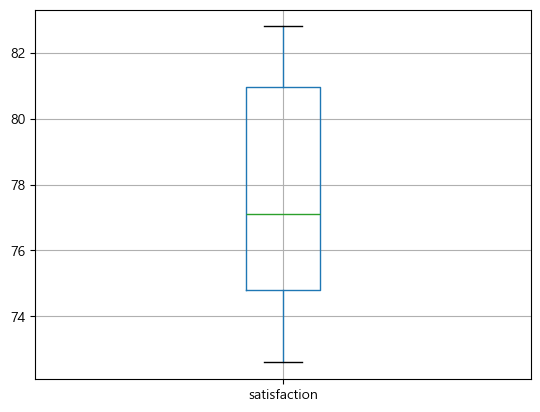

In [267]:
# 고객서비스센터의 고객 만족도의 평균은 76.7 개선활동후 10개의 고객만족도 데이터를 얻었다. 개선활동이 유의미했는가?
df = pd.DataFrame({'satisfaction' : [74.5,81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})
df.boxplot();

In [271]:
# satisfaction 정규성 검정
statistic, p = stats.shapiro(df['satisfaction'])
print('satisfaction = {}, p-value={}'.format(statistic,p))

satisfaction = 0.9331594705581665, p-value=0.4796782433986664


In [275]:
# 1-sample t-test
t_result = stats.ttest_1samp(df,76.7)
# TtestResult(statistic=array([0.86437028]), pvalue=array([0.40983028]), df=array([9]))
# 1-sample t-test의 t값 p값 저장
t , p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [277]:
# 1-sample t-test의 t값 p값 출력
print('1_Sample t-test')
print('t 통계량 : {}'.format(t))
print('p-value : {}'.format(p))

1_Sample t-test
t 통계량 : [0.864]
p-value : [0.41]


In [279]:
# 결론 유의수준 5%내에서 P값이 0.41이므로 개선활동이 고객만족도를 변화시켰다고 할 수 없다(대립가설 기각, 귀무가설 채택)

In [281]:
# 고객서비스센터의 고객 만족도의 평균은 78.0 개선활동후 10개의 고객만족도 데이터를 얻었다. 개선활동이 유의미했는가?
df = pd.DataFrame({'satisfaction' : [85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})

df.head()

,satisfaction
0,85.0
1,79.0
2,79.1
3,79.9
4,81.6


In [283]:
# satisfaction 정규성 검정
statistic, p = stats.shapiro(df['satisfaction'])
print('satisfaction = {}, p-value={}'.format(statistic,p))

satisfaction = 0.8473217487335205, p-value=0.0539751797914505


In [289]:
# 1-sample t-test
t_result = stats.ttest_1samp(df,78.0)
# TtestResult(statistic=array([3.37924492]), pvalue=array([0.00813672]), df=array([9]))
# 1-sample t-test의 t값 p값 저장
t , p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [291]:
# 1-sample t-test의 t값 p값 출력
print('1_Sample t-test')
print('t 통계량 : {}'.format(t))
print('p-value : {}'.format(p))

1_Sample t-test
t 통계량 : [3.379]
p-value : [0.008]


In [293]:
# 결론 유의수준 5%내에서 P값이 0.08이므로 개선활동이 고객만족도를 변화시켰다고 할 수 있다(대립가설 채택, 귀무가설 기각)

# 2 sample t-test

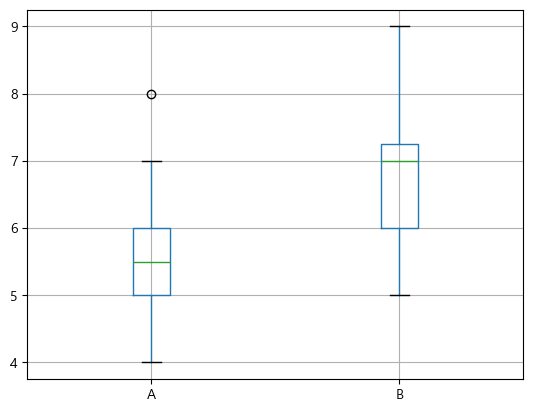

In [303]:
# A 고객과 B 고객의 모평균에 차이가 있다고 할 수 있는가
# 유의수준 0.05
df = pd.DataFrame({'A' :[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7] , 'B':[7,6,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
# group별 boxplot
df.boxplot(['A','B']);

In [305]:
# 정규성 검정
statistic, p = stats.shapiro(df['A'])
print('statistic = {}, P-value = {}'.format(statistic,p))

statistic = 0.9094840288162231, P-value = 0.06230909377336502


In [307]:
statistic, p = stats.shapiro(df['B'])
print('statistic = {}, P-value = {}'.format(statistic,p))

statistic = 0.914249062538147, P-value = 0.07683517038822174


In [309]:
# 등분산성 검정
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=0.0784806443146898, pvalue=0.7793670509889603)

In [311]:
# 2-sample t-test
t_result = stats.ttest_ind(df['A'], df['B'])

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [315]:
# t,p값 출력
print('2 Sample t-test')
print(' t : {}'.format(t))
print(' p-value : {}'.format(p))

2 Sample t-test
 t : -3.335
 p-value : 0.002


In [317]:
# 유의수준 0.05에서 검정결과값이 0.02이므로 고객간의 고객만족도에 차이가 있다
# 또한 T 값이 음수이므로 B고객의 만족도가 더 높다

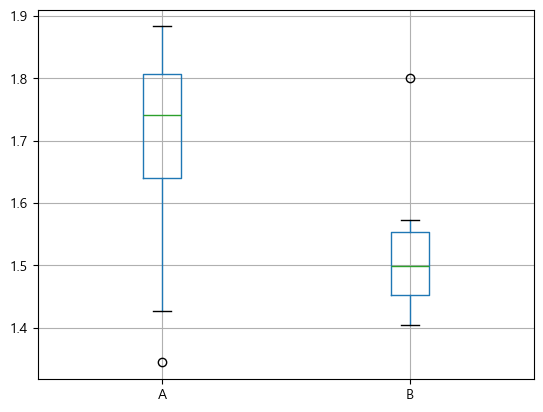

In [325]:
# 공급자별 제품의 두께 공급자간의 모평균에 차이가 있는가?
# 유의수준 0.05
df = pd.DataFrame({'A' :[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344] , 'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.800]})
# group별 boxplot
df.boxplot(['A','B']);

In [327]:
# 정규성 검정
statistic, p = stats.shapiro(df['A'])
print('statistic = {}, P-value = {}'.format(statistic,p))

statistic = 0.8425754904747009, P-value = 0.08004532009363174


In [329]:
statistic, p = stats.shapiro(df['B'])
print('statistic = {}, P-value = {}'.format(statistic,p))

statistic = 0.8393934369087219, P-value = 0.07424874603748322


In [331]:
# 등분산성 검정
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=1.2899966318541203, pvalue=0.25604857136527204)

In [333]:
# 2-sample t-test
t_result = stats.ttest_ind(df['A'], df['B'])

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [336]:
# t,p값 출력
print('2 Sample t-test')
print(' t : {}'.format(t))
print(' p-value : {}'.format(p))

2 Sample t-test
 t : 1.94
 p-value : 0.073


In [338]:
# 유의수준 0.05에서 검정결과값이 0.073이므로 공급자간의 모평균에 차이가 없다
# 또한 T 값이 양수이므로 A두께가 더 두껍다

# Paired t-test

In [346]:
# 영어학원가기 전 후 에 대해 차이
df1 = pd.DataFrame({'before' : [720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after' : [810,670,790,712,810,670,790,712,790,712]})

# Paried t-test
t_result = stats.ttest_rel(df1,df2)
# TtestResult(statistic=array([-5.3239145]), pvalue=array([0.00047851]), df=array([9]))

# Paried t-test의 t값 p값 저장
t , p = t_result.statistic.round(3), t_result.pvalue.round(3)

# Paried t-test의 t값 p 값 출력
print('2 Sample t-test')
print(' t : {}'.format(t))
print(' p-value : {}'.format(p))

2 Sample t-test
 t : [-5.324]
 p-value : [0.]


In [348]:
# 유의수준 5%에서 검정결과 p값이 0.000이므로 학원 수강 전후의 차이는 있다. 대립가설 채택, 귀무가설 기각

In [350]:
# 영어학원가기 전 후 에 대해 차이 
df1 = pd.DataFrame({'before' : [720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after' : [710,580,787,712,750,600,782,670,790,680]})

# Paried t-test
t_result = stats.ttest_rel(df1,df2)
# TtestResult(statistic=array([-5.3239145]), pvalue=array([0.00047851]), df=array([9]))

# Paried t-test의 t값 p값 저장
t , p = t_result.statistic.round(3), t_result.pvalue.round(3)

# Paried t-test의 t값 p 값 출력
print('2 Sample t-test')
print(' t : {}'.format(t))
print(' p-value : {}'.format(p))

2 Sample t-test
 t : [-2.266]
 p-value : [0.05]


In [ ]:
# 유의수준 5%에서 검정결과 p값이 0.05이므로 학원 수강 전후의 차이는 있다. 대립가설 채택, 귀무가설 기각
# 또한 t값이 음수이므로 after의 diff평균이 더 크다